### Reverse engineering JPL Horizons visual magnitude calculations

I want to calculate visual magnitudes that closely match the models used by the JPL Horizons online tool. Here is code for loading the files.

In [147]:
import re
import math

class Item:
    def __init__(self, mag, helio_dist, geo_dist, phase_angle):
        self.mag = mag
        self.norm = mag - 5*math.log10(helio_dist * geo_dist)
        self.helio_dist = helio_dist
        self.geo_dist = geo_dist
        self.phase_angle = phase_angle
        
    def __str__(self):
        return '(m={:0.3f}, n={:0.3f}, h={:0.6f}, g={:0.6f}, a={:0.3f})'.format(self.mag, self.norm, self.helio_dist, self.geo_dist, self.phase_angle)

def LoadMagnitudeData(filename):
    data = []
    with open(filename, 'rt') as infile:
        for line in infile:
            m = re.match(r'^\s(\d{4})-(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)-(\d{2})\s(\d{2}):(\d{2})\s+(-?\d+\.\d+)\s+(-?\d+\.\d+)\s+(-?\d+\.\d+)\s+(-?\d+\.\d+)\s+(-?\d+\.\d+)\s+(-?\d+\.\d+)\s+(-?\d+\.\d+)\s*$', line)
            if m:
                # We are only going to capture magnitude, phase, geo_dist, and helio_dist
                mag = float(m.group(6))
                helio_dist = float(m.group(8))
                geo_dist = float(m.group(10))
                phase_angle = float(m.group(12))
                data.append(Item(mag, helio_dist, geo_dist, phase_angle))
    return data

In [148]:
Data = {}
for body in ['Moon', 'Mercury', 'Venus', 'Mars', 'Jupiter', 'Uranus', 'Neptune', 'Pluto']:
    Data[body] = LoadMagnitudeData(body + '.txt')

In [149]:
print(len(Data['Venus']))
print(Data['Venus'][0])
print(Data['Venus'][-1])

3570
(m=-3.960, n=-4.431, h=0.727243, g=1.708095, a=3.568)
(m=-4.260, n=-0.707, h=0.719386, g=0.270672, a=165.032)


### Graphing normalized magnitude versus phase angle
Each planet has a distinctive way of reflecting light at different angles.

In [150]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['lines.markersize'] = 1
print(plt.rcParams['lines.markersize'])

def Plot(body):
    data = Data[body]
    phase_list = [x.phase_angle for x in data]
    norm_list = [x.norm for x in data]
    plt.scatter(phase_list, norm_list)

1.0


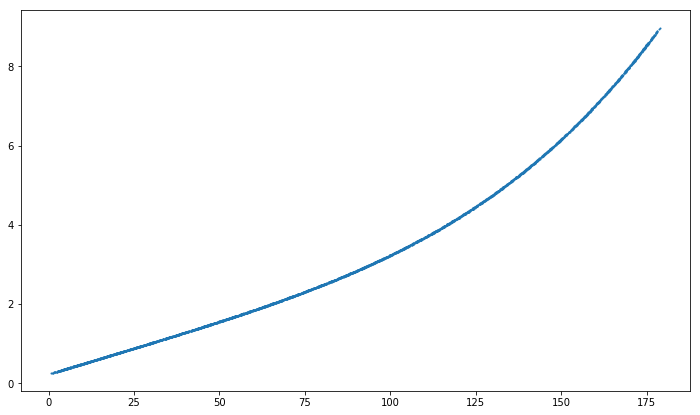

In [151]:
Plot('Moon')

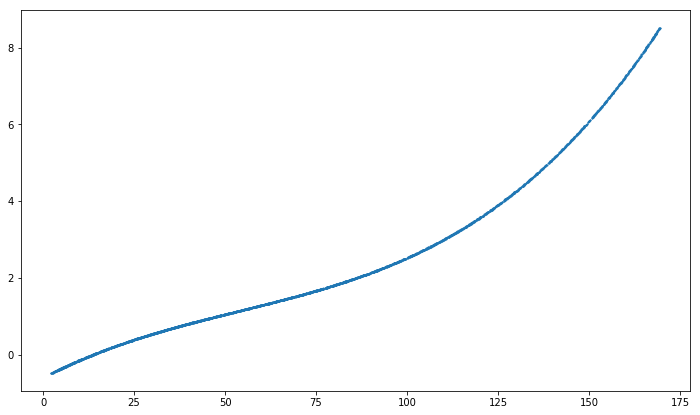

In [152]:
Plot('Mercury')

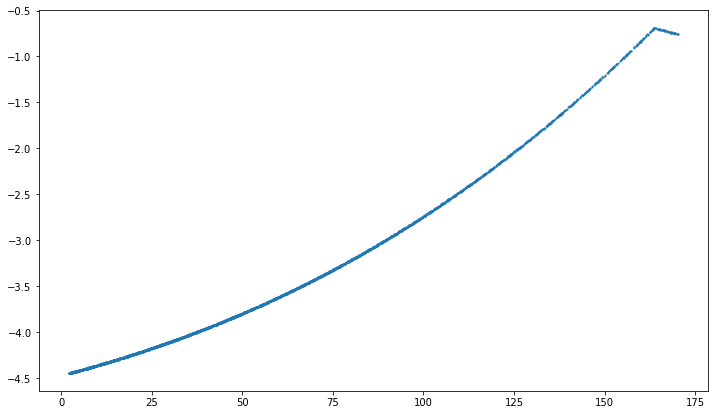

In [153]:
Plot('Venus')

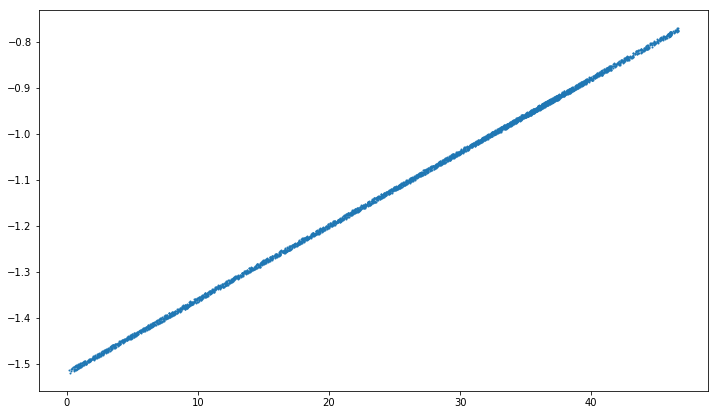

In [154]:
Plot('Mars')

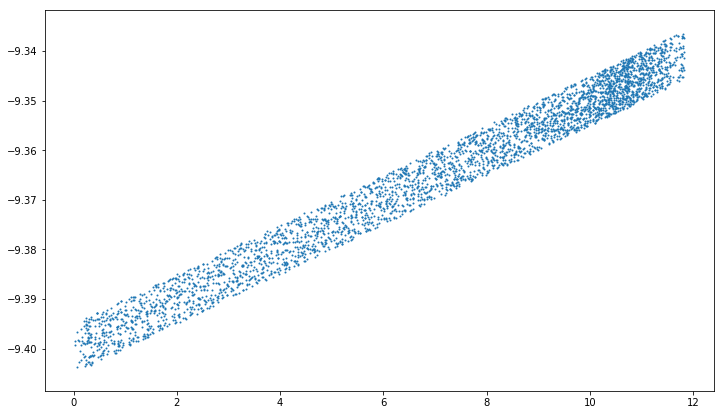

In [155]:
Plot('Jupiter')

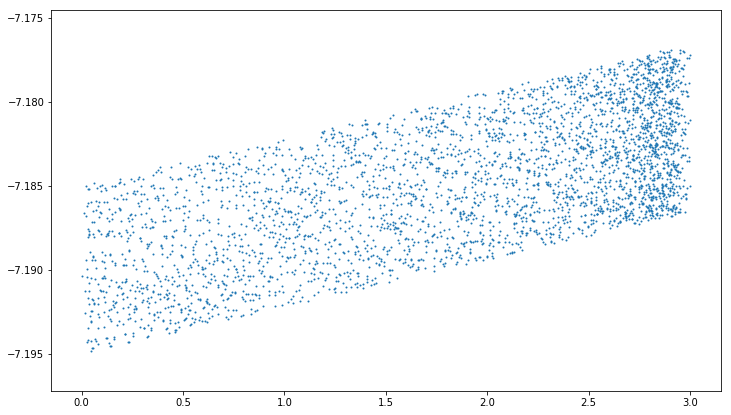

In [156]:
Plot('Uranus')

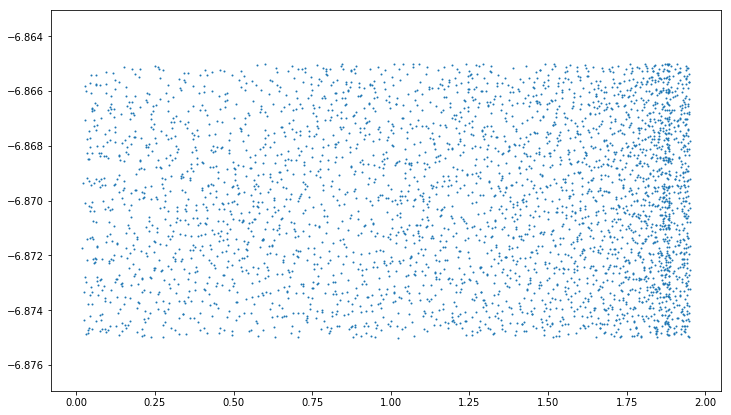

In [157]:
Plot('Neptune')

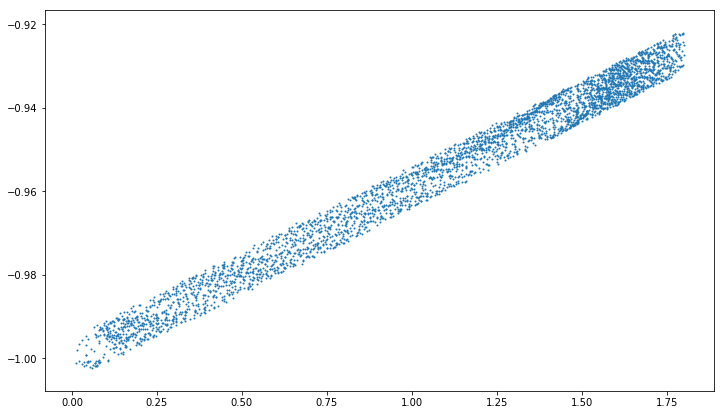

In [158]:
Plot('Pluto')

I found the following article about updated models for phase curves of Mercury and Venus:

https://iopscience.iop.org/article/10.1086/430212/pdf


-12.717
-4.0732115564871245
178.8623
0.7044


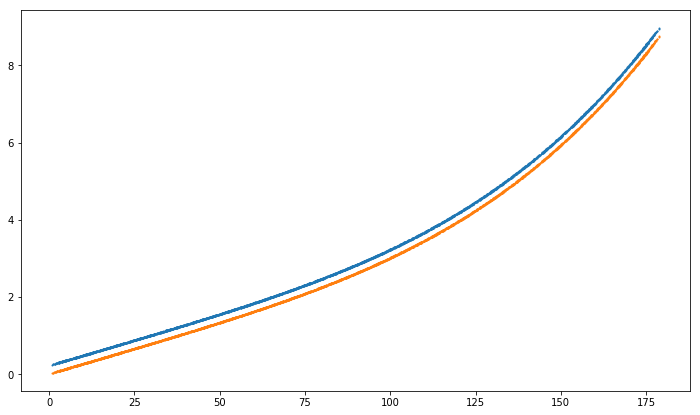

In [159]:
def MoonMag(phase):
    rad = phase * (math.pi / 180)
    mag = -12.717 + 1.49*abs(rad) + 0.0431*(rad**4)
    return mag

print(MoonMag(0))
print(MoonMag(178))
print(max(x.phase_angle for x in Data['Moon']))
print(min(x.phase_angle for x in Data['Moon']))

def MoonPlot():
    data = Data['Moon']
    phase_list = [x.phase_angle for x in data]
    norm_list = [x.norm for x in data]
    plt.scatter(phase_list, norm_list)
    calc_list = [MoonMag(x.phase_angle)+12.73 for x in data]
    plt.scatter(phase_list, calc_list)
    
MoonPlot()

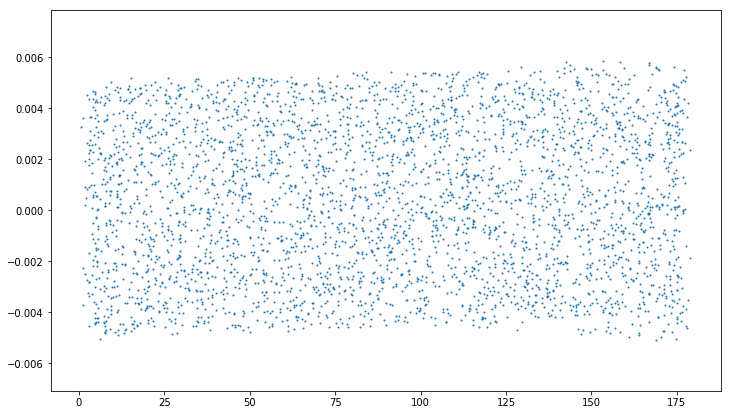

In [160]:
def MoonPlotDiff():
    data = Data['Moon']
    phase_list = [x.phase_angle for x in data]
    norm_list = [x.norm for x in data]
    calc_list = [MoonMag(x.phase_angle)-x.norm+12.947 for x in data]
    plt.scatter(phase_list, calc_list)
    
MoonPlotDiff()